In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [4]:
incidents_08_11_16 = pd.read_json("https://data.seattle.gov/resource/tazs-3rd5.json?$query=SELECT%0A%20%20%60report_number%60%2C%0A%20%20%60report_date_time%60%2C%0A%20%20%60offense_id%60%2C%0A%20%20%60offense_date%60%2C%0A%20%20%60nibrs_group_a_b%60%2C%0A%20%20%60nibrs_crime_against_category%60%2C%0A%20%20%60offense_sub_category%60%2C%0A%20%20%60shooting_type_group%60%2C%0A%20%20%60block_address%60%2C%0A%20%20%60latitude%60%2C%0A%20%20%60longitude%60%2C%0A%20%20%60beat%60%2C%0A%20%20%60precinct%60%2C%0A%20%20%60sector%60%2C%0A%20%20%60neighborhood%60%2C%0A%20%20%60reporting_area%60%2C%0A%20%20%60offense_category%60%2C%0A%20%20%60nibrs_offense_code_description%60%2C%0A%20%20%60nibrs_offense_code%60%0AWHERE%0A%20%20%60report_date_time%60%0A%20%20%20%20BETWEEN%20%222025-08-11T16%3A38%3A25%22%20%3A%3A%20floating_timestamp%0A%20%20%20%20AND%20%222025-08-16T16%3A38%3A25%22%20%3A%3A%20floating_timestamp")
incidents_08_11_16.head()


,report_number,report_date_time,offense_id,offense_date,nibrs_group_a_b,nibrs_crime_against_category,offense_sub_category,shooting_type_group,block_address,latitude,longitude,beat,precinct,sector,neighborhood,reporting_area,offense_category,nibrs_offense_code_description,nibrs_offense_code
0,2025-913894,2025-08-11 16:51:36,65410733998,2025-08-09T13:30:00.000,A,PROPERTY,"PROPERTY OFFENSES (INCLUDES STOLEN, DESTRUCTION)",-,3XX BLOCK OF 5TH AVE,47.60199368,-122.327684528824,K3,West,K,DOWNTOWN COMMERCIAL,820,ALL OTHER,Destruction/Damage/Vandalism of Property,290
1,2025-913895,2025-08-11 16:52:05,65410737518,2025-08-10T23:28:00.000,A,PROPERTY,BURGLARY,-,18XX BLOCK OF 19TH AVE S,47.5866535,-122.308145527939,R1,South,R,NORTH BEACON HILL,2712,PROPERTY CRIME,Burglary/Breaking & Entering,220
2,2025-913896,2025-08-11 16:52:33,65410741004,2025-08-09T21:00:00.000,B,ANY,ALL OTHER,-,65XX BLOCK OF 36TH AVE SW,47.54379576,-122.377812102616,W3,Southwest,W,MORGAN,193,ALL OTHER,All Other Offenses,90Z
3,2025-913897,2025-08-11 16:52:57,65410745189,2025-08-11T01:00:00.000,A,PROPERTY,"PROPERTY OFFENSES (INCLUDES STOLEN, DESTRUCTION)",-,77XX BLOCK OF 21ST AVE NE,47.68544977,-122.305394827051,U1,North,U,ROOSEVELT/RAVENNA,7319,ALL OTHER,Destruction/Damage/Vandalism of Property,290
4,2025-913898,2025-08-11 16:53:19,65410747604,2025-08-09T01:00:00.000,A,PROPERTY,BURGLARY,-,34XX BLOCK OF 15TH AVE W,47.65125451,-122.376255905676,Q1,West,Q,MAGNOLIA,11216,PROPERTY CRIME,Burglary/Breaking & Entering,220


Conventional wisdom is that crime rises in the summer time, so I'm going to compare two incident frames from the hottest time of the summer, mid-August, with winter time. Here's my import of crime data from August 11-16, and checking the head to make sure my import went smoothly.

In [5]:
len(incidents_08_11_16)

972

Checking my unique incidents with the len function, there were 972 reported crimes in this period. 

In [6]:
incidents_02_11_16 = pd.read_json("https://data.seattle.gov/resource/tazs-3rd5.json?$query=SELECT%0A%20%20%60report_number%60%2C%0A%20%20%60report_date_time%60%2C%0A%20%20%60offense_id%60%2C%0A%20%20%60offense_date%60%2C%0A%20%20%60nibrs_group_a_b%60%2C%0A%20%20%60nibrs_crime_against_category%60%2C%0A%20%20%60offense_sub_category%60%2C%0A%20%20%60shooting_type_group%60%2C%0A%20%20%60block_address%60%2C%0A%20%20%60latitude%60%2C%0A%20%20%60longitude%60%2C%0A%20%20%60beat%60%2C%0A%20%20%60precinct%60%2C%0A%20%20%60sector%60%2C%0A%20%20%60neighborhood%60%2C%0A%20%20%60reporting_area%60%2C%0A%20%20%60offense_category%60%2C%0A%20%20%60nibrs_offense_code_description%60%2C%0A%20%20%60nibrs_offense_code%60%0AWHERE%0A%20%20%60report_date_time%60%0A%20%20%20%20BETWEEN%20%222025-02-11T16%3A38%3A25%22%20%3A%3A%20floating_timestamp%0A%20%20%20%20AND%20%222025-02-16T16%3A38%3A25%22%20%3A%3A%20floating_timestamp")
incidents_02_11_16.head()

,report_number,report_date_time,offense_id,offense_date,nibrs_group_a_b,nibrs_crime_against_category,offense_sub_category,shooting_type_group,block_address,latitude,longitude,beat,precinct,sector,neighborhood,reporting_area,offense_category,nibrs_offense_code_description,nibrs_offense_code
0,2025-039052,2025-02-11 16:47:04,62731157796,2024-01-01T15:00:00.000,A,PERSON,ASSAULT OFFENSES,-,REDACTED,REDACTED,REDACTED,N1,North,N,BITTERLAKE,REDACTED,ALL OTHER,Simple Assault,13B
1,2025-039054,2025-02-11 17:03:07,62731305704,2025-02-10T21:00:00.000,A,PROPERTY,"PROPERTY OFFENSES (INCLUDES STOLEN, DESTRUCTION)",-,92XX BLOCK OF 57TH AVE S,47.51978102,-122.261590411311,S3,South,S,RAINIER BEACH,7018,ALL OTHER,Destruction/Damage/Vandalism of Property,290
2,2025-039106,2025-02-11 17:14:09,62731634418,2025-02-10T20:00:00.000,A,PROPERTY,MOTOR VEHICLE THEFT,-,22XX BLOCK OF EASTLAKE AVE E,47.63898704,-122.325893413493,D3,West,D,EASTLAKE - WEST,12569,PROPERTY CRIME,Motor Vehicle Theft,240
3,2025-038922,2025-02-11 17:46:43,62732790572,2025-02-11T06:53:00.000,A,PROPERTY,EXTORTION/FRAUD/FORGERY/BRIBERY (INCLUDES BAD ...,-,24XX BLOCK OF NE 65TH ST,47.67577382,-122.301162906497,U1,North,U,ROOSEVELT/RAVENNA,5697,ALL OTHER,Wire Fraud,26E
4,2025-038932,2025-02-11 17:48:49,62732905734,2025-02-11T12:44:00.000,A,PROPERTY,BURGLARY,-,20XX BLOCK OF YALE AVE E,47.63750671,-122.327114615043,D3,West,D,EASTLAKE - WEST,10249,PROPERTY CRIME,Burglary/Breaking & Entering,220


I've pulled the same day period, February 11-16. Import went well, so let's check the total incidents. 

In [7]:
len(incidents_02_11_16)

852

In [8]:
# Q1.1 Which period had the highest number of total crimes?
# A: The first one, August 11-16, with 972 vs. 852 in February.

Now that I have my incident data imported and know the August period is the one I will be focusing in on, I will further query to find out which beats had the highest number of violent crimes. To do so I will first create a variable that filters down to just violent crime, then I will create another variable that groups those by beat. Finally, I will sort the values to see the beat with the highest violent crime. 

In [9]:
i_08_violent = incidents_08_11_16[incidents_08_11_16['offense_category'] == 'VIOLENT CRIME']
i_08_violent_beats = i_08_violent.groupby('beat').size()
i_08_violent_beats.sort_values(ascending=False)

beat
D1    7
R1    4
B2    3
E1    3
N2    3
M3    3
K3    3
G3    3
K2    3
K1    2
W1    2
U3    2
S2    2
R2    2
W2    2
F3    2
F2    2
E3    2
J1    1
F1    1
C1    1
C3    1
U1    1
S3    1
E2    1
S1    1
O3    1
Q3    1
G1    1
O1    1
N3    1
M1    1
L3    1
B3    1
L1    1
L2    1
dtype: int64

In [10]:
# Q1.2 Which beat shows the highest number of violent crimes? 
# A: Beat D1 with 7 violent crimes.

Next I will check how many property crimes happened on the second to last day of my dataset (August 15, 2025). To do so I will create a new variable using dt functions to isolate that date, then group by crime type.

In [11]:
i_0815 = incidents_08_11_16[incidents_08_11_16['report_date_time'].dt.date == pd.to_datetime('2025-08-15').date()]
prop_cat = i_0815.groupby('offense_category').size()
prop_cat['PROPERTY CRIME']

78

In [12]:
# Q1.3 How many property crime happens on the second to last day of the dataset you queried?  
# A: 78 property crimes happened on the second to last day (August 15, 2025).

Next I want to see which incident type was the most common over the time period I queried. It's quite similar to how I queried the property crime, but I will use the whole period dataset and then sort to see the top value. 

In [13]:
i_bycat = incidents_08_11_16.groupby('offense_category').size()
i_bycat_sort = i_bycat.sort_values(ascending=False)
i_bycat_sort

offense_category
ALL OTHER         481
PROPERTY CRIME    423
VIOLENT CRIME      68
dtype: int64

In [14]:
# Q2.1 What incident type was most common over the time period you queried?
# A: ALL OTHER with 481 incidents.

To see which neighborhood this offense type was most prevalent in, it will be a similar process to Q1.2, only grouping by the "Neighborhood" field instead. 

In [15]:
# filter rows where offense_category equals 'ALL OTHER'
i_08_other = incidents_08_11_16[incidents_08_11_16['offense_category'] == 'ALL OTHER']
i_08_other_neigh = i_08_other.groupby('neighborhood').size()
i_08_other_neigh_sort = i_08_other_neigh.sort_values(ascending=False)
i_08_other_neigh_sort

neighborhood
CAPITOL HILL                        40
DOWNTOWN COMMERCIAL                 37
CHINATOWN/INTERNATIONAL DISTRICT    28
CENTRAL AREA/SQUIRE PARK            20
ROOSEVELT/RAVENNA                   19
SLU/CASCADE                         19
NORTHGATE                           19
FIRST HILL                          18
BITTERLAKE                          17
BELLTOWN                            17
MOUNT BAKER                         16
UNIVERSITY                          15
LAKECITY                            14
NORTH BEACON HILL                   13
PIONEER SQUARE                      13
QUEEN ANNE                          12
ROXHILL/WESTWOOD/ARBOR HEIGHTS      12
BALLARD SOUTH                        9
RAINIER BEACH                        8
SODO                                 8
EASTLAKE - WEST                      8
UNKNOWN                              8
SANDPOINT                            7
NORTH DELRIDGE                       7
MADRONA/LESCHI                       7
ALASKA JUNCT

In [16]:
# Q2.2.1 In which neighborhood was that incident type (ALL OTHER) most prevalent? 
# A: Capitol Hill with 40 incidents

Now I need to plot this as a bar plot to show crime by neighborhood. To do so I just need to do a basic bar plot, renaming the series created in my sortby function. However, to do this I first need to reset the index, as it created a series and it won't plot as a dataframe-the reset.index() key will set the series as a dataframe. 

<Axes: title={'center': 'Number of ALL OTHER Incidents per Neighborhood (Aug 11-16, 2025)'}, xlabel='neighborhood'>

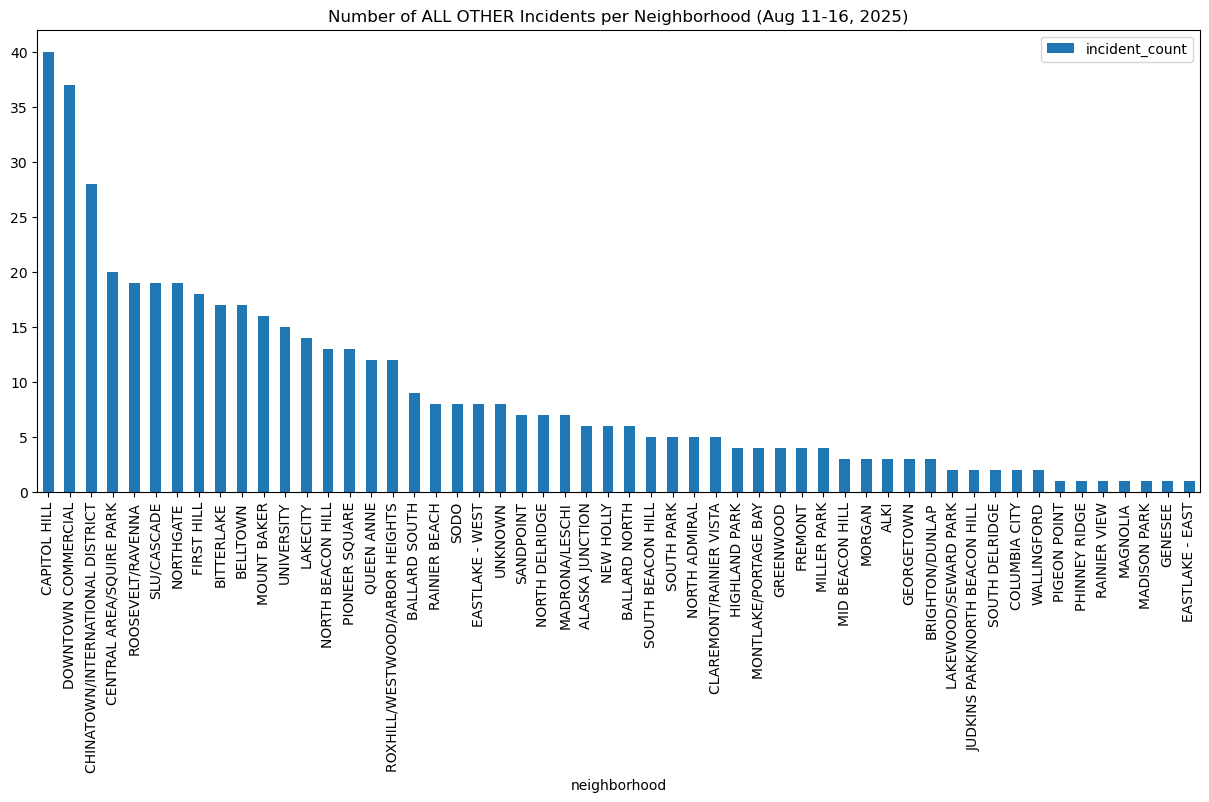

In [17]:
# Q2.2.2 Include a plot of the number of incidents per neighborhood only of that incident type.
i_08_other_neigh_sort = i_08_other_neigh_sort.reset_index()
i_08_other_neigh_sort = i_08_other_neigh_sort.rename(columns={0: 'incident_count'})
i_08_other_neigh_sort.plot.bar(x='neighborhood', 
                               y='incident_count',  
                               title='Number of ALL OTHER Incidents per Neighborhood (Aug 11-16, 2025)',
                               figsize=(15,6))

In [18]:
beats=gpd.read_file("https://services.arcgis.com/ZOyb2t4B0UYuYNYH/arcgis/rest/services/Current_Beats/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")

In [19]:
nbh=gpd.read_file("https://services.arcgis.com/ZOyb2t4B0UYuYNYH/arcgis/rest/services/nma_nhoods_sub/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")
nbh

,OBJECTID,L_HOOD,S_HOOD,S_HOOD_ALT_NAMES,Shape__Area,Shape__Length,geometry
0,27,Ballard,Loyal Heights,None,2.132066e+07,18831.009596,"POLYGON ((-122.38 47.676, -122.38 47.676, -122..."
1,28,Ballard,Ballard,Adams,2.255213e+07,29926.339300,"POLYGON ((-122.38 47.668, -122.38 47.667, -122..."
2,29,Ballard,Whittier Heights,None,1.419569e+07,15934.439266,"POLYGON ((-122.38 47.676, -122.38 47.676, -122..."
3,30,Ballard,West Woodland,None,2.219937e+07,21789.651087,"POLYGON ((-122.38 47.676, -122.38 47.676, -122..."
4,31,North Central,Phinney Ridge,Woodland Park,3.212312e+07,27120.785938,"POLYGON ((-122.35 47.665, -122.35 47.665, -122..."
...,...,...,...,...,...,...,...
89,119,Ballard,Sunset Hill,"Golden Gardens, Shilshole",2.433562e+07,29416.730063,"POLYGON ((-122.4 47.698, -122.4 47.698, -122.4..."
90,121,University District,University District,None,1.368625e+07,21581.645979,"POLYGON ((-122.3 47.668, -122.3 47.668, -122.3..."
91,123,University District,University Heights,Cowen Park,1.037575e+07,15163.906910,"POLYGON ((-122.31 47.673, -122.31 47.673, -122..."
92,124,Downtown,Denny Triangle,Denny Regrade,5.128172e+06,10574.177983,"POLYGON ((-122.34 47.613, -122.34 47.614, -122..."


Importing neigborhoods and beats for further analysis.

In [20]:
incidents_02_11_16['longitude'].describe()

count          852
unique         562
top       REDACTED
freq           144
Name: longitude, dtype: object

In [21]:
incidents_02_11_16['latitude'].describe()

count          852
unique         553
top       REDACTED
freq           144
Name: latitude, dtype: object

In [22]:
incidents_08_11_16['longitude'].describe()

count          972
unique         658
top       REDACTED
freq           167
Name: longitude, dtype: object

In [23]:
incidents_08_11_16['latitude'].describe()

count          972
unique         637
top       REDACTED
freq           167
Name: latitude, dtype: object

As in the practice, getting a sense of my longitude and latitude datas-lots of REDACTED values that will need to be removed

In [24]:
i_08_11_16_ugly1 = incidents_08_11_16[(incidents_08_11_16['longitude'] != 'REDACTED') & (incidents_08_11_16['latitude'] != 'REDACTED')]
i_08_11_16_ugly1.describe()

,report_date_time,offense_id
count,805,8.050000e+02
mean,2025-08-13 23:30:56.857142784,6.545671e+10
min,2025-08-11 16:51:36,6.541073e+10
25%,2025-08-12 18:45:41,6.543732e+10
50%,2025-08-13 17:04:15,6.544832e+10
75%,2025-08-15 03:40:44,6.547050e+10
max,2025-08-16 16:24:31,6.682831e+10
std,NaN,6.723155e+07


In [25]:
i_02_11_16_ugly1 = incidents_02_11_16[(incidents_02_11_16['longitude'] != 'REDACTED') & (incidents_02_11_16['latitude'] != 'REDACTED')]
i_02_11_16_ugly1.describe()

,report_date_time,offense_id
count,708,7.080000e+02
mean,2025-02-14 04:15:48.072033792,6.279270e+10
min,2025-02-11 17:03:07,6.273131e+10
25%,2025-02-12 21:48:32.500000,6.275275e+10
50%,2025-02-14 05:14:47,6.276964e+10
75%,2025-02-15 10:49:26.750000128,6.280379e+10
max,2025-02-16 16:32:19,6.568270e+10
std,NaN,1.683649e+08


Removing redacted long&lat fields from both dataframes to be able to plot it. The values are still string objects though, meaning Python will just interpret them as text. Need to convert to float to do anything with the data. Another note: named these "ugly" because there's a lot of data we won't need in here. 

In [26]:
i_08_11_16_ugly = i_08_11_16_ugly1.astype({'longitude':'float', 'latitude':'float'})
# Now that the longitude and latitude fields are floats, we can create a GeoDataFrame
i_08_11_16_ugly = gpd.GeoDataFrame(i_08_11_16_ugly, geometry=gpd.points_from_xy(i_08_11_16_ugly['longitude'], i_08_11_16_ugly['latitude']), crs="EPSG:4326")


<Axes: >

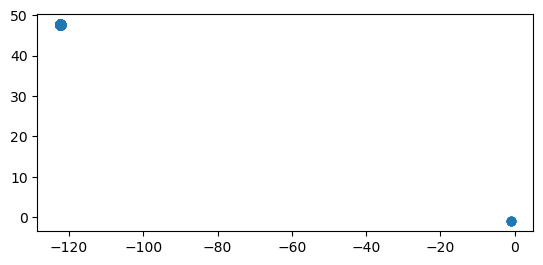

In [27]:
i_08_11_16_ugly.plot()

We have a geodataframe that matplot can read, but something's wrong with our data. Let's look at the longitude and latitude again. 

In [28]:
i_08_11_16_ugly['latitude'].describe()

count    805.000000
mean      47.255606
std        4.184631
min       -1.000000
25%       47.584978
50%       47.612991
75%       47.662165
max       47.734128
Name: latitude, dtype: float64

In [29]:
i_08_11_16_ugly['longitude'].describe()

count    805.000000
mean    -121.423141
std       10.442009
min     -122.412539
25%     -122.345291
50%     -122.325136
75%     -122.305508
max       -1.000000
Name: longitude, dtype: float64

So the max of -1 in the longitude and the min of -1 are the culprits. Let's filter those out.

<Axes: >

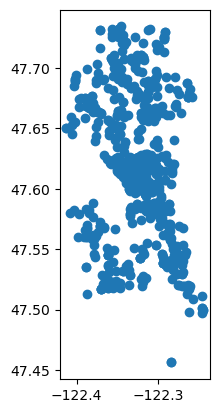

In [30]:
i_08_11_16_ugly2 = i_08_11_16_ugly[(i_08_11_16_ugly['longitude'] != -1) & (i_08_11_16_ugly['latitude'] != -1)]
i_08_11_16_ugly2.plot()

Now I have a plottable map, but there are several columns I don't need-time to filter that out and make a cleaned,optimized dataset. 

In [31]:
i_08_11_16 = i_08_11_16_ugly2[['report_number', 'report_date_time', 'offense_id',  'latitude', 'longitude',  'offense_category', 'geometry']]
i_08_11_16.head()

,report_number,report_date_time,offense_id,latitude,longitude,offense_category,geometry
0,2025-913894,2025-08-11 16:51:36,65410733998,47.601994,-122.327685,ALL OTHER,POINT (-122.33 47.602)
1,2025-913895,2025-08-11 16:52:05,65410737518,47.586653,-122.308146,PROPERTY CRIME,POINT (-122.31 47.587)
2,2025-913896,2025-08-11 16:52:33,65410741004,47.543796,-122.377812,ALL OTHER,POINT (-122.38 47.544)
3,2025-913897,2025-08-11 16:52:57,65410745189,47.685450,-122.305395,ALL OTHER,POINT (-122.31 47.685)
4,2025-913898,2025-08-11 16:53:19,65410747604,47.651255,-122.376256,PROPERTY CRIME,POINT (-122.38 47.651)


Now I have a cleaned, plottable dataset for the first date range. Let's just repeat the process for the February one, and I can move on. 

In [32]:
i_02_11_16_ugly = i_02_11_16_ugly1.astype({'longitude':'float', 'latitude':'float'})
i_02_11_16_ugly = gpd.GeoDataFrame(i_02_11_16_ugly, geometry=gpd.points_from_xy(i_02_11_16_ugly['longitude'], i_02_11_16_ugly['latitude']), crs="EPSG:4326")

<Axes: >

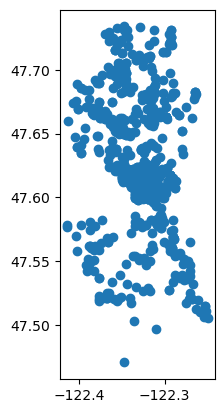

In [33]:
i_02_11_16_ugly2 = i_02_11_16_ugly[(i_02_11_16_ugly['longitude'] != -1) & (i_02_11_16_ugly['latitude'] != -1)]
i_02_11_16_ugly2.plot()

In [34]:
i_02_11_16 = i_02_11_16_ugly2[['report_number', 'report_date_time', 'offense_id',  'latitude', 'longitude',  'offense_category', 'geometry']]
i_02_11_16

,report_number,report_date_time,offense_id,latitude,longitude,offense_category,geometry
1,2025-039054,2025-02-11 17:03:07,62731305704,47.519781,-122.261590,ALL OTHER,POINT (-122.26 47.52)
2,2025-039106,2025-02-11 17:14:09,62731634418,47.638987,-122.325893,PROPERTY CRIME,POINT (-122.33 47.639)
3,2025-038922,2025-02-11 17:46:43,62732790572,47.675774,-122.301163,ALL OTHER,POINT (-122.3 47.676)
4,2025-038932,2025-02-11 17:48:49,62732905734,47.637507,-122.327115,PROPERTY CRIME,POINT (-122.33 47.638)
5,2025-038932,2025-02-11 17:48:49,62753779052,47.637507,-122.327115,PROPERTY CRIME,POINT (-122.33 47.638)
...,...,...,...,...,...,...,...
846,2025-043421,2025-02-16 15:49:20,64023634776,47.623944,-122.360633,PROPERTY CRIME,POINT (-122.36 47.624)
847,2025-043362,2025-02-16 15:53:41,62812905725,47.662506,-122.350031,ALL OTHER,POINT (-122.35 47.663)
848,2025-043426,2025-02-16 16:12:22,62813017633,47.691130,-122.351314,PROPERTY CRIME,POINT (-122.35 47.691)
849,2025-043361,2025-02-16 16:17:49,62813041266,47.661468,-122.369693,VIOLENT CRIME,POINT (-122.37 47.661)


Now it's time to make some maps. I first want to classify my offense_categories to be able to display them in folium popus. To do so I need to convert my offense_id to a list, then create a variable to assign colors to them. 

In [35]:
offense_type = i_08_11_16['offense_category'].unique().tolist()
offense_type

['ALL OTHER', 'PROPERTY CRIME', 'VIOLENT CRIME']

Now I have a listed format for my crimes (I can use this list for both datasets) and just need to assign them colors:

In [36]:
colors = {'PROPERTY CRIME': 'red', 
          'VIOLENT CRIME': 'blue', 
          'ALL OTHER': 'green'}

In [37]:
import folium

Importing folium to get popup maps capabilities

### Q1: Create a map for each dataset queried:

In [38]:
i_08_map = folium.Map(location=[47.6062, -122.3321], zoom_start=10)
for index, row in i_08_11_16.iterrows():
    #iterates through each row in the dataframe, returning the index and the row data
    folium.Marker(location=[row['latitude'], row['longitude']],
                  #finds locations for the folium markers based on latitude and longitude columns
                        radius=3,
                        popup=row['offense_category'],
                        #finds the offense category row for the popup
                        fill=True,
                        fill_color=colors[row['offense_category']],
                         icon=folium.Icon(color=colors.get(row['offense_category'], 'gray')),
                         #Adds colors based on the offense category variable
                       ).add_to(i_08_map)
i_08_map

In [39]:
i_02_map = folium.Map(location=[47.6062, -122.3321], zoom_start=10)
for index, row in i_02_11_16.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']],
                        radius=3,
                        popup=row['offense_category'],
                        fill=True,
                        fill_color=colors[row['offense_category']],
                         icon=folium.Icon(color=colors.get(row['offense_category'], 'gray')),
                       ).add_to(i_02_map)
i_02_map

Now I need to create a buffer around the University of Washington. First I'll go back into my neighborhood file and examine the UW polygon, just to make sure I'm looking at the correct shape.

<Axes: >

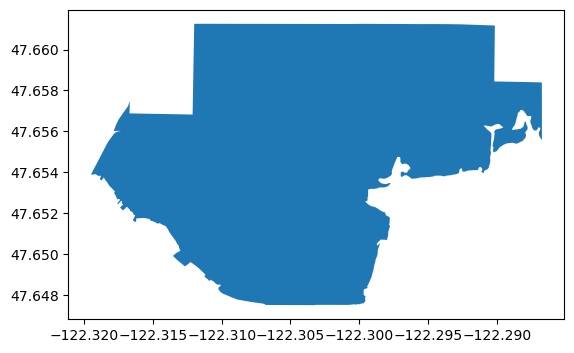

In [40]:
nbh[nbh['S_HOOD']=='University of Washington'].plot()

Looks good, I'll work with this value for my buffering file. First I need to extract UW from the wider neighborhood file.

In [41]:
uw = nbh[nbh['S_HOOD']=='University of Washington']

In [42]:
uw.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

It's in wgs84 CRS, which measures in degrees. I need to be working in meters to create a buffer, so I'll reproject into UTM to create the 750m buffer file. 

In [43]:
uw_utm = uw.to_crs(epsg=32610)
uw_buffer = uw_utm.buffer(750)


Now I have my buffer file, which I need in degrees for folium to recognize-so I'll reproject into its original crs

In [44]:
uw_buffer_deg = uw_buffer.to_crs(epsg=4326)

Now I have the buffer as a Geoseries, but I need a geodataframe to perform more complex plotting. 

<Axes: >

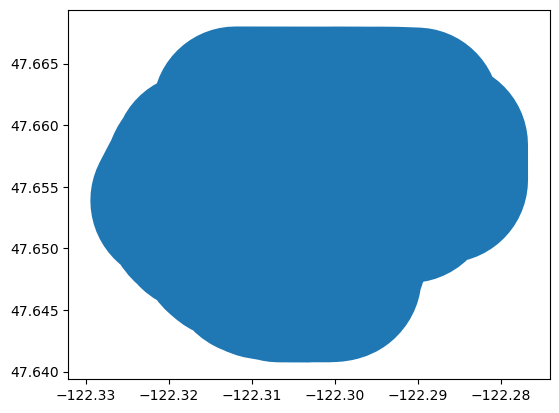

In [45]:
uw_buffer_gdf = gpd.GeoDataFrame(geometry=uw_buffer_deg, crs="EPSG:4326")
uw_buffer_gdf.plot()
#Q3 Create a 750 meter buffer around University of Washington. 

Now I want to find the crimes within the buffer, so I'll use my cleaned August incidents GDF and perform an overlay to restrict it to crimes within the buffer zone. 

In [46]:
crime_uw = gpd.overlay(i_08_11_16, uw_buffer_gdf, how='intersection')
crime_uw.head()

,report_number,report_date_time,offense_id,latitude,longitude,offense_category,geometry
0,2025-230067,2025-08-11 22:02:52,65412474860,47.662188,-122.314262,ALL OTHER,POINT (-122.31 47.662)
1,2025-230243,2025-08-12 11:35:02,65430398247,47.663799,-122.300899,PROPERTY CRIME,POINT (-122.3 47.664)
2,2025-230762,2025-08-12 13:01:50,65432982435,47.662473,-122.320720,ALL OTHER,POINT (-122.32 47.662)
3,2025-230762,2025-08-12 13:01:50,65432448012,47.662473,-122.320720,ALL OTHER,POINT (-122.32 47.662)
4,2025-913935,2025-08-12 15:27:50,65434341960,47.659203,-122.302188,PROPERTY CRIME,POINT (-122.3 47.659)


I've isolated just crimes within the buffer zone, but to create a bar plot with incidents per day I'll need to use dt to extract days from the report_date_time field

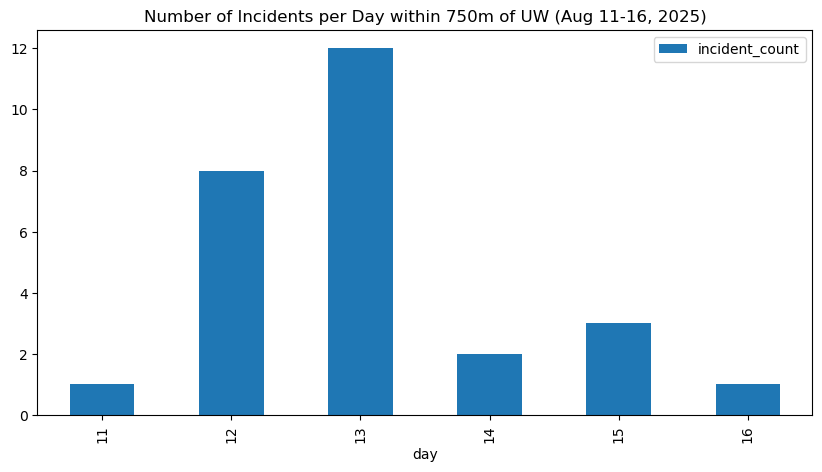

In [47]:
crime_uw['day'] = crime_uw['report_date_time'].dt.day
incidents_per_day = crime_uw.groupby('day').size().reset_index(name='incident_count')
incidents_per_day.plot.bar(x='day', 
                               y='incident_count',  
                               title='Number of Incidents per Day within 750m of UW (Aug 11-16, 2025)',
                               figsize=(10,5));
#Q3.1 Create a bar plot to show the number of incidents per day in the time period you queried:

Now to create a folium map. To do so I need to add both the geojson of my buffer zone, and markers displaying the incidents using the template I created earlier. 

In [48]:
uw_crime_map = folium.Map(location=[47.6546, -122.3048], zoom_start=12)
for index, row in crime_uw.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        popup=row['offense_category'],
                        fill=True,
                        fill_color=colors[row['offense_category']],
                         icon=folium.Icon(color=colors.get(row['offense_category'], 'gray')),
                       ).add_to(uw_crime_map)
folium.GeoJson(
    data = uw_buffer_gdf.to_json(),
).add_to(uw_crime_map)

uw_crime_map
#Q3.2 Create a folium map which displays the buffer boundary and all crime incidents within the buffer, with different colored markers for each crime category:

### Q3.3 Provide a brief analysis about the incidents events from the bar plot and the map. (200 words)
August 13 was by far the highest-crime day of my dataset. Looking back over the days, it was just a Wednesday, not a holiday or special event that you would expect to have significantly higher crime, so I’m not sure why it spiked so much on that day in particular. As far as the crime breakdown, there was very little violent crime, just one on north campus around 25th Ave. The property and miscellaneous crimes were distributed about where I would expect. A high concentration around the Ave, and then another high concentration around University Village, which makes sense. The Ave is pretty seedy, and I would expect to see a lot of property crime in a high-end mall like UVille and its surrounding shops (seems to hug Sandpoint way fairly tightly). Far less crime on campus proper, which tracks with my experience. There’s surprisingly little that actually spreads out into campus despite the U District being so chaotic. By the eye test, I’m only seeing one incident that took place on campus. I could definitely analyze this further. I filtered out the “offense_sub_category” field when I created the incidents file, but that could be an interesting way to get further insights on this data. Include that field in the original filtering equation, and then change the folium markers to include the more specific data (larceny, auto theft, assault, etc). But it would be pretty messy. (236 Words)

I know what the highest-crime day was in the UW, so now I'm going to create a heatmap displaying incidents on that day. My first step is to use my cleaned dataaset for my date range and isolate August 13.

In [49]:
i_0813 = i_08_11_16[i_08_11_16['report_date_time'].dt.date == pd.to_datetime('2025-08-13').date()]
i_0813.head()

,report_number,report_date_time,offense_id,latitude,longitude,offense_category,geometry
278,2025-229425,2025-08-13 00:05:31,65454133241,47.614655,-122.320790,ALL OTHER,POINT (-122.32 47.615)
279,2025-229425,2025-08-13 00:05:31,65438227057,47.614655,-122.320790,ALL OTHER,POINT (-122.32 47.615)
280,2025-230372,2025-08-13 00:07:48,65439145118,47.675843,-122.319022,ALL OTHER,POINT (-122.32 47.676)
281,2025-231465,2025-08-13 00:12:52,65438365864,47.649249,-122.321670,PROPERTY CRIME,POINT (-122.32 47.649)
282,2025-231420,2025-08-13 01:16:44,65439106903,47.661262,-122.311993,ALL OTHER,POINT (-122.31 47.661)


Now I have all the incidents from the 13th as a GDF, but to make the headmap work I need a new field sorting by the hour. dt.hour will do this.

In [50]:
i_0813['hour'] = pd.to_datetime(i_0813['report_date_time'].sort_values(ascending=True)).dt.hour
i_0813.head()

c:\Users\turne\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,report_number,report_date_time,offense_id,latitude,longitude,offense_category,geometry,hour
278,2025-229425,2025-08-13 00:05:31,65454133241,47.614655,-122.320790,ALL OTHER,POINT (-122.32 47.615),0
279,2025-229425,2025-08-13 00:05:31,65438227057,47.614655,-122.320790,ALL OTHER,POINT (-122.32 47.615),0
280,2025-230372,2025-08-13 00:07:48,65439145118,47.675843,-122.319022,ALL OTHER,POINT (-122.32 47.676),0
281,2025-231465,2025-08-13 00:12:52,65438365864,47.649249,-122.321670,PROPERTY CRIME,POINT (-122.32 47.649),0
282,2025-231420,2025-08-13 01:16:44,65439106903,47.661262,-122.311993,ALL OTHER,POINT (-122.31 47.661),1


Looking at my head, I've successfully added a field that indexes by hour-the first incident at 12:05 AM has "0" for the hour field, incidents at 7 AM have "7", etc. I've also sorted the values so the dataframe ascends from the earliest incident. Now I need to create an empty data dictionary, aggregate the incidents by the hour variable, and create a forloop that iterates the aggregate incidents and appends them to the dictionary. 

In [51]:
data = []
for _, d in i_0813.groupby('hour'):
    data.append([[row['latitude'], row['longitude']] for _, row in d.iterrows()])



Now I have my data dictionary that will populate the map, and I need to create my time delta. To do so I'll extract the earliest record in the dataframe as "base_date". My time index will first combine my base date with a min_time dt function, creating a variable that can be used for a time delta. It will then iterate through my dataset hourly using "for k in range len(data)". strftime will be used to display the data nicely with time and AM/PM using ("%I %p"). This would still left a hanging 0 on the side of the string, so lstrip('0') will remove this for prettier display. 

In [ ]:
from datetime import datetime, timedelta

base_date = i_0813['report_date_time'].iloc[0].date()

time_index = [
    (datetime.combine(base_date, datetime.min.time()) + k * timedelta(hours=1)).strftime("%I %p").lstrip('0') 
    for k in range(len(data))
]

Now that I have my time indexed, I just need to import heatmap functionality and create a basemap with folium. After I have this, I will create a heatmap variable that combines the data field with the time_index I created, and display!

In [ ]:
from folium.plugins import HeatMapWithTime

i_0313_map = folium.Map(location=[47.6008863,-122.3377], zoom_start=10)

hm = folium.plugins.HeatMapWithTime(data, index=time_index, auto_play=True, max_opacity=0.3)

hm.add_to(i_0313_map)
display(i_0313_map)
#Q4.2: Make an Autoplay Heatmap with Timestamp of one date in the dataset you queried displaying the incident locations by one hour time interval: